In [43]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [54]:
class EarlyStoppingAtMinLoss(tf.keras.callbacks.Callback):
  """Stop training when the loss is at its min, i.e. the loss stops decreasing.

  Arguments:
      patience: Number of epochs to wait after min has been hit. After this
      number of no improvement, training stops.
  """

  def __init__(self, patience=3):
    super(EarlyStoppingAtMinLoss, self).__init__()

    self.patience = patience

    # best_weights to store the weights at which the minimum loss occurs.
    self.best_weights = None

  def on_train_begin(self, logs=None):
    # The number of epoch it has waited when loss is no longer minimum.
    self.wait = 0
    # The epoch the training stops at.
    self.stopped_epoch = 0
    # Initialize the best as infinity.
    self.best = np.Inf

  def on_epoch_end(self, epoch, logs=None):
    current = logs.get('val_loss')
    if np.less(current, self.best):
      self.best = current
      self.wait = 0
      # Record the best weights if current results is better (less).
      self.best_weights = self.model.get_weights()
    else:
      self.wait += 1
      if self.wait >= self.patience:
        self.stopped_epoch = epoch
        self.model.stop_training = True
        print('Restoring model weights from the end of the best epoch.')
        self.model.set_weights(self.best_weights)

  def on_train_end(self, logs=None):
    if self.stopped_epoch > 0:
      print('Epoch %05d: early stopping' % (self.stopped_epoch + 1))

In [55]:
def cnn_1_layer() : 
    model = models.Sequential()
    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation  = 'relu', input_shape = (28, 28, 1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10,activation = 'softmax'))
    model.summary()
    model.compile(optimizer = 'adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  validation_split = 0.2)
    return model

In [56]:
def cnn_2_layer() : 
    model = models.Sequential()
    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation  = 'relu', input_shape = (28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10,activation = 'softmax'))
    model.summary()
    model.compile(optimizer = 'adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  validation_split = 0.2)
    return model

In [57]:
def cnn_3_layer() : 
    model = models.Sequential()
    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation  = 'relu', input_shape = (28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10,activation = 'softmax'))
    model.summary()
    model.compile(optimizer = 'adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  validation_split = 0.2)
    return model

In [58]:
def cnn_full() : 
    model = models.Sequential()
    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation  = 'relu', input_shape = (28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10,activation = 'softmax'))
    model.summary()
    model.compile(optimizer = 'adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  validation_split = 0.2)
    return model

In [59]:

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [60]:
model = cnn_1_layer()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                216330    
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(train_images, 
                    train_labels, 
                    validation_split=0.33, 
                    batch_size=100, 
                    epochs=15,
                    callbacks = [EarlyStoppingAtMinLoss()])

Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 4s 101us/sample - loss: 0.3077 - accuracy: 0.9139 - val_loss: 0.1460 - val_accuracy: 0.9611
Epoch 2/15
40199/40199 [==============================] - 4s 98us/sample - loss: 0.1046 - accuracy: 0.9708 - val_loss: 0.1025 - val_accuracy: 0.9699
Epoch 3/15
40199/40199 [==============================] - 4s 98us/sample - loss: 0.0680 - accuracy: 0.9808 - val_loss: 0.0824 - val_accuracy: 0.9760
Epoch 4/15
40199/40199 [==============================] - 4s 99us/sample - loss: 0.0499 - accuracy: 0.9863 - val_loss: 0.0796 - val_accuracy: 0.9765
Epoch 5/15
40199/40199 [==============================] - 4s 98us/sample - loss: 0.0394 - accuracy: 0.9884 - val_loss: 0.0810 - val_accuracy: 0.9770
Epoch 6/15
40199/40199 [==============================] - 4s 98us/sample - loss: 0.0314 - accuracy: 0.9914 - val_loss: 0.0806 - val_accuracy: 0.9767
Epoch 7/15
40199/40199 [==============================]

In [62]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


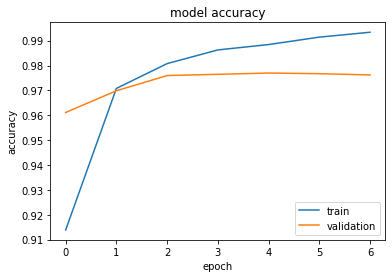

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

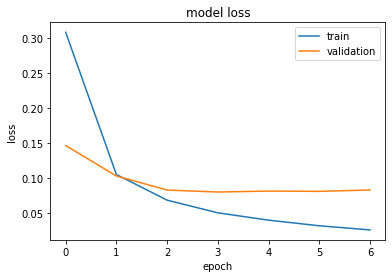

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()